In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np

In [2]:
movie_file = "Data/movies_metadata.csv"
movie_df = pd.read_csv(movie_file)
movie_df.head() 

C:\Users\kames\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [75]:
# Create a filtered dataframe from specific columns
movies_cols = [ "imdb_id","title", "budget", "revenue","production_companies","popularity" ]
movies_df= movie_df[movies_cols].copy()


movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['budget'] = movies_df['budget'].replace(0, np.nan)
movies_df[movies_df['budget'].isnull()].shape

movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['revenue'] = movies_df['revenue'].replace(0, np.nan)
movies_df[movies_df['revenue'].isnull()].shape

# Clean the data by dropping duplicates and setting the index
movies_df.drop_duplicates("title", inplace=True)
movies_df['imdb_id'] = movies_df['imdb_id'].str[3:]

movies_df=movies_df.rename(columns={'imdb_id':'imdbId'})

#movies_df.set_index('imdbId', inplace=True)

movies_df.head()

,imdbId,title,budget,revenue,production_companies,popularity
0,114709,Toy Story,30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",21.9469
1,113497,Jumanji,65000000.0,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",17.0155
2,113228,Grumpier Old Men,NaN,NaN,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",11.7129
3,114885,Waiting to Exhale,16000000.0,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...,3.85949
4,113041,Father of the Bride Part II,NaN,76578911.0,"[{'name': 'Sandollar Productions', 'id': 5842}...",8.38752


In [103]:
disneydata =pd.read_csv('Data/disney_movies.csv', parse_dates=['release_date'])
disneydata

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


In [65]:
rating_file = "Data/ratings_small.csv"
rating_df = pd.read_csv(rating_file)
rating_df.head() 

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [66]:
link_file = "Data/links_small.csv"
link_df = pd.read_csv(link_file)
link_df.head() 

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [67]:
# Create a filtered dataframe from specific columns
ratings_cols = ["movieId","rating"]
ratings_df= rating_df[ratings_cols].copy()

ratings_df.set_index("movieId", inplace=True)

ratings_df.head()

,rating
movieId,
31,2.5
1029,3.0
1061,3.0
1129,2.0
1172,4.0


In [68]:
# Create a filtered dataframe from specific columns
links_cols = ["movieId","imdbId"]
links_df= link_df[links_cols].copy()

links_df.set_index("movieId", inplace=True)

links_df.head()

,imdbId
movieId,
1,114709
2,113497
3,113228
4,114885
5,113041


In [69]:
imdbratings_df = pd.merge(ratings_df, links_df, on='movieId', how='inner')
# Need to reset combined_df index to imdb_id and drop tt letters in front of other imdb_id to combine
imdbratings_df.set_index("imdbId", inplace=True)
imdbratings_df

,rating
imdbId,
112792,2.5
112792,3.0
112792,4.0
112792,4.0
112792,3.0
...,...
449040,2.5
362478,3.5
114131,3.0


In [101]:
grouped_imdbId = imdbratings_df.groupby(['imdbId']).agg({'rating': ['mean',]})
#grouped_imdbId.rename(columns={“ratingmean”: “ratings average for each movie"})
grouped_imdbId

grouped_imdbId.imdbId.dtype
 


AttributeError: 'DataFrame' object has no attribute 'imdbId'

In [102]:
#merge all the tables find final dataframe
final_df = pd.merge(grouped_imdbId, movies_df, on='imdbId', how='inner')


C:\Users\kames\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [77]:

#df = pd.concat([movies_df, pd.DataFrame(list(movies_df['production_companies'])).fillna(0).astype(int)], axis=1)
#df_pollutants = pd.DataFrame(movies_df['production_companies'].values.tolist(), index= movies_df.index)
#df1 = pd.concat([pd.DataFrame(x) for x in movies_df['production_companies']], keys= movies_df.index).reset_index(level=1,drop=True)
#df = df.drop('', axis=1).join(df1).reset_index(drop=True)

In [104]:
import ast 

#print(ast.literal_eval(movies_df['production_companies'][0]))
    
    
for p in ast.literal_eval(movies_df['production_companies'][2]):
    
    for key,value in p.items():
        
            print(value)
        
    
   

Warner Bros.
6194
Lancaster Gate
19464


In [105]:
# Sort data by the adjusted gross in descending order 
inflation_adjusted_gross_desc = disneydata.sort_values(by='inflation_adjusted_gross', ascending=False) 

# Display the top 10 movies 
inflation_adjusted_gross_desc.head(10)


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


In [106]:
# Extract year from release_date and store it in a new column
disneydata['release_year'] = pd.DatetimeIndex(disneydata['release_date']).year

# Compute mean of adjusted gross per genre and per year
group = disneydata.groupby(['genre','release_year']).mean()

# Convert the GroupBy object to a DataFrame
genre_yearly = group.reset_index()

# Inspect genre_yearly 
genre_yearly.head(10)

,genre,release_year,total_gross,inflation_adjusted_gross
0,Action,1981,0.0,0.0
1,Action,1982,26918576.0,77184895.0
2,Action,1988,17577696.0,36053517.0
3,Action,1990,59249588.5,118358772.0
4,Action,1991,28924936.5,57918572.5
5,Action,1992,29028000.0,58965304.0
6,Action,1993,21943553.5,44682157.0
7,Action,1994,19180582.0,39545796.0
8,Action,1995,63037553.5,122162426.5
9,Action,1996,135281096.0,257755262.5


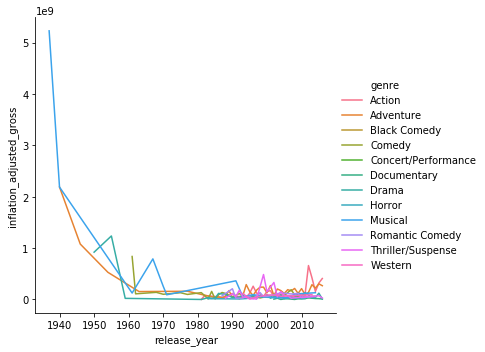

In [107]:
import seaborn as sns

# Plot inflation  
sns.relplot(kind='line', x='release_year', y='inflation_adjusted_gross', hue='genre', data=genre_yearly)